In [10]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import LabelEncoder  # For data preprocessing
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN) Model
from sklearn.svm import SVC  # Support Vector Machine (SVM) Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Evaluation metrics

In [11]:

# Step 1: Load the dataset
df = pd.read_csv("Iris.csv")  # Ensure iris.csv is in the working directory  relative path
#df = pd.read_csv(r"D:\pythoncode\MLLab\Assignment1\Iris.csv") 

In [12]:

# Step 2: Display basic dataset information
print("Dataset Overview:")
print(df.head())  # Display first 5 rows

Dataset Overview:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [13]:
print("\nDataset Summary:")
df.describe()# Display statistical summary


Dataset Summary:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
print("\nDataset Info:")
print(df.info())  # Display dataset structure


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [15]:
# Step 3: Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())  # Check for null values in each column


Missing Values in Dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


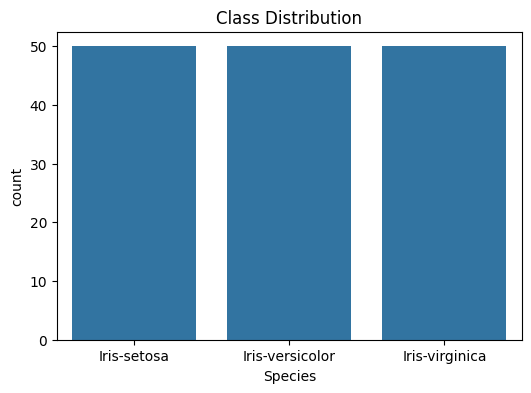

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [16]:
# Step 4: Visualize data distribution   dataset balance 
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df)  # Count of each species
plt.title("Class Distribution")
plt.show()
print(df.columns) 
print(df["Species"].unique()) 

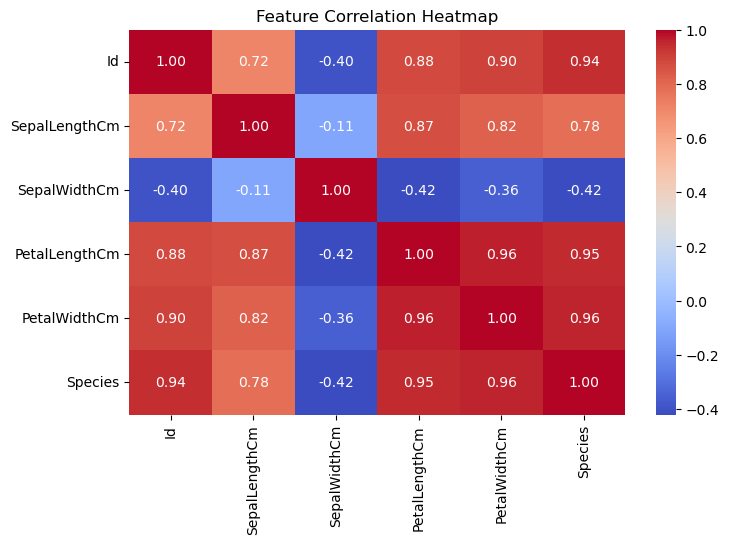

In [ ]:
### 1. Correlation Analysis - Heatmap ###
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

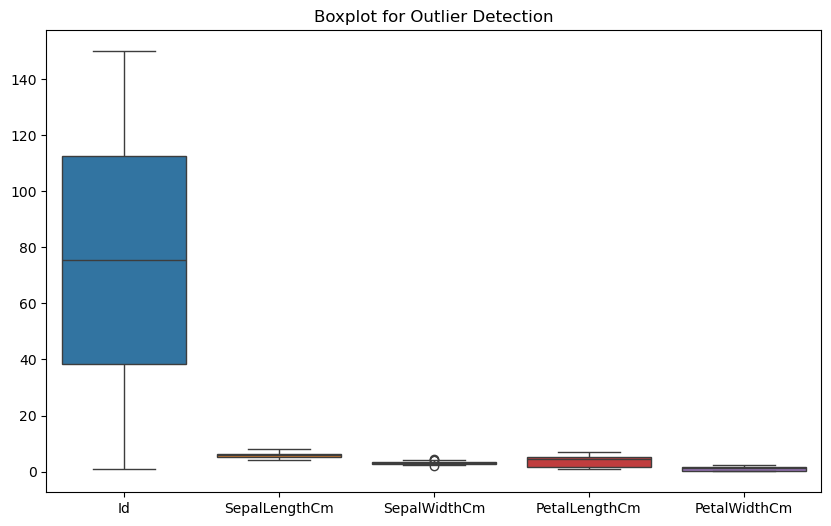

In [ ]:
### 3. Outlier Detection - Boxplots ###
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["Species"]))
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
# Step 5: Convert categorical target variable into numeric values
encoder = LabelEncoder()  # Initialize label encoder
df['Species'] = encoder.fit_transform(df['Species'])  # Encode species labels into numeric values

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# Step 6: Split dataset into features (X) and target variable (y)
X = df.drop(columns=['Species'])  # Features
y = df['Species']  # Target variable

In [20]:
# Step 7: Split the dataset into training (70%), test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% test

In [21]:
# Step 9: Train K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN with 5 neighbors
knn.fit(X_train, y_train)  # Train KNN model
y_pred_knn = knn.predict(X_test)  # Predict using trained model

In [22]:
# Step 10: Train Support Vector Machine (SVM) model
svm = SVC(kernel='linear')  # Initialize SVM with linear kernel
svm.fit(X_train, y_train)  # Train SVM model
y_pred_svm = svm.predict(X_test)  # Predict using trained model

In [23]:
# Step 12: Define a function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    """
    Function to evaluate a given model using confusion matrix, classification report, and accuracy score.
    
    Parameters:
        model_name (str): Name of the model being evaluated
        y_true (array): Actual labels
        y_pred (array): Predicted labels
        
    Returns:
        None
    """
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))  # Display confusion matrix
    print("Classification Report:\n", classification_report(y_true, y_pred))  # Display classification report
    print("Accuracy Score:", accuracy_score(y_true, y_pred))  # Display accuracy score


In [24]:
# Step 13: Evaluate all models
evaluate_model("KNN", y_test, y_pred_knn)



Model: KNN
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy Score: 1.0


In [25]:
evaluate_model("SVM", y_test, y_pred_svm)



Model: SVM
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy Score: 1.0


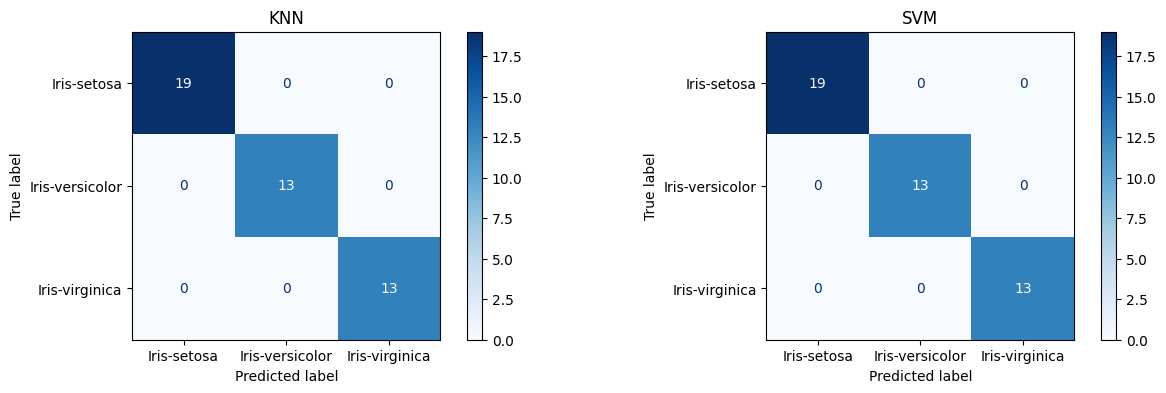

In [26]:
# Step 14: Visualize confusion matrices for all models
from sklearn.metrics import ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(15, 4))  # Create subplots for 2 models
# Generate and display confusion matrices for each model
for ax, (model, y_pred, title) in zip(axes, 
    [(knn, y_pred_knn, "KNN"), (svm, y_pred_svm, "SVM")]):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="Blues")
    ax.set_title(title)

plt.show()  # Display all confusion matrices